Stephanie Leroux
2020-04-22

### Time evolution of the E-std of SSH spatially averaged over the MEDWEST domain
* from the 3 20-members experiments i have so far:
    - GSL14: Stochastic STD of 1%, exp starting in Feb 2010
    - GSL15: Stochastic STD of 5%, exp starting in Feb 2010
    - GSL16: Stochastic STD of 1%, exp starting in Aug 2010
* The e-std was computed on JZ via ```cdfenstats```

---
## Modules

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
#import powerspec as ps
#import Plot_PowerSpec as pp

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

---
## Read ESTATS files 
(computed from cdftool cdfenstat on JZ)

In [2]:
# READ

diri='/mnt/meom/workdir/lerouste/MEDWEST60/'
dircoord ='/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-I/'

estd_GSL14 = xr.open_mfdataset(diri+'MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL14-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
estd_GSL15 = xr.open_mfdataset(diri+'MEDWEST60-GSL15-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL15-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
estd_GSL16 = xr.open_mfdataset(diri+'MEDWEST60-GSL16-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL16-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']

#estd3m_GSL14 = xr.open_mfdataset(diri+'MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'+'ESTATS_3MB_MEDWEST60-GSL14-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
#estd3m_GSL13 = xr.open_mfdataset(diri+'MEDWEST60-GSL13-S/ens01/1h/gridT-2D/'+'ESTATS_3MB_MEDWEST60-GSL13-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']

nav_lon   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lon']
nav_lat   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lat']
maskmap   = xr.open_dataset(dircoord+'MEDWEST60_mask.nc4')['tmask'][0,0,:,:].squeeze()

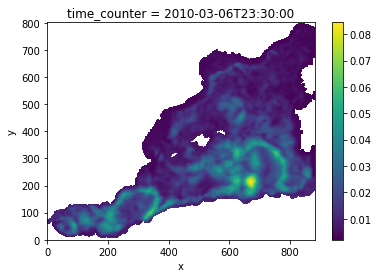

In [3]:
estd_GSL15.isel(time_counter=719).squeeze().where(maskmap>0).plot()

## Spatial average (quick and diry, not using e1e2 here...)

In [61]:
DOM_estd_GSL14 = slx.spavedom(estd_GSL14.where(maskmap>0))
DOM_estd_GSL15 = slx.spavedom(estd_GSL15.where(maskmap>0))
DOM_estd_GSL16 = slx.spavedom(estd_GSL16.where(maskmap>0))
DOM_estd3m_GSL13 = slx.spavedom(estd3m_GSL13.where(maskmap>0))

# PLOT

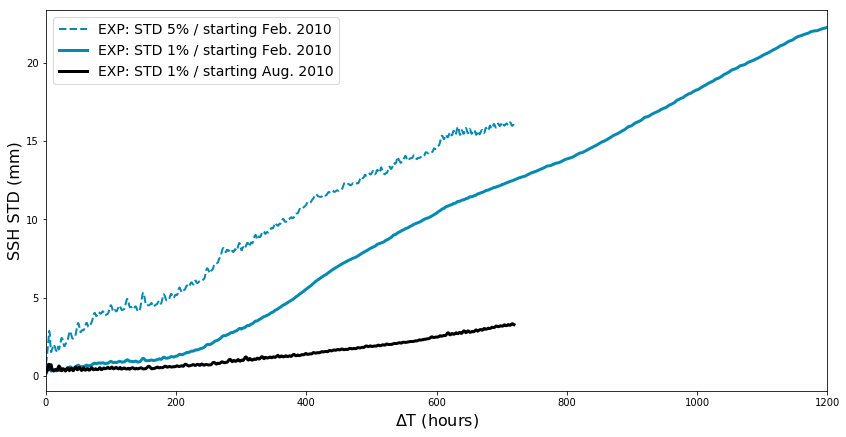

In [76]:
latexvarname = "SSH"
varname = "SSH"
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

fac=1e3
faclabel='1e3'


fig1 = plt.figure(figsize=([14,7]),facecolor='white')

plt.plot(DOM_estd_GSL15*fac,color='#0489B1',linestyle='--',linewidth=2,label='EXP: STD 5% / starting Feb. 2010')
plt.plot(DOM_estd_GSL14*fac,color='#0489B1',linestyle='-',linewidth=3,label='EXP: STD 1% / starting Feb. 2010')
plt.plot(DOM_estd_GSL16*fac,color='k', linestyle='-',linewidth=3,label='EXP: STD 1% / starting Aug. 2010')

#plt.plot(DOM_estd3m_GSL14.isel(time_counter=slice(0,470))*fac,color='#0489B1',linestyle='-',linewidth=2,label='(3MB) EXP: STD 1% / start Feb. 2010')
#plt.plot(DOM_estd3m_GSL13.isel(time_counter=slice(0,470))*fac,color='r',linestyle=':',linewidth=3,label='GSL13')
#plt.plot(STDensdom_b*fac,color='g',linestyle=':',linewidth=5,label='GSL13py')

plt.xlabel('$\Delta$T (hours)',size=16)

ysize=16
if ((fac!=1)&(fac!=(1e3))):
    plt.ylabel(faclabel+'x '+latexvarname+' STD (m)',size=ysize)
elif fac==(1e3):   
    plt.ylabel(latexvarname+' STD (mm)',size=ysize)     
else:
    plt.ylabel(latexvarname+' STD (m)',size=ysize)
 
#plt.ylim(0,6.5)
plt.xlim(0,1200)

plt.legend(fontsize=14)    
plt.show()
slx.saveplt(fig1,diro,'ts_STD_'+varname)




---
## Test
Below i m just doing a very simple test to check the difference between unbiased and biased STD and whether it explains why i had different results between cdfenstats et xr.std

* SSH values of 3 members at a grid point and one tinmestep

In [46]:
toto0=sshensb.isel(time_counter=469,x=700,y=350)
toto0.values

array([-0.43917409, -0.43954781, -0.44476196], dtype=float32)

* unbiased computation

In [36]:
toto = toto0-(toto0[0]+toto0[1]+toto0[2])/3.

In [37]:
var = (toto[0])**2+(toto[1])**2+(toto[2])**2
var = var/2.

In [47]:
std=np.sqrt(var)
std

<xarray.DataArray 'sossheig' ()>
array(0.0031238715164363384, dtype=float32)
Coordinates:
    nav_lat        float32 39.3278
    nav_lon        float32 6.14546
    time_centered  datetime64[ns] 2010-02-24T13:30:00
    time_counter   datetime64[ns] 2010-02-24T13:30:00

* biased

In [48]:
varb = (toto[0])**2+(toto[1])**2+(toto[2])**2
varb = varb/3.
stdb=np.sqrt(varb)
stdb

<xarray.DataArray 'sossheig' ()>
array(0.0025506303645670414, dtype=float32)
Coordinates:
    nav_lat        float32 39.3278
    nav_lon        float32 6.14546
    time_centered  datetime64[ns] 2010-02-24T13:30:00
    time_counter   datetime64[ns] 2010-02-24T13:30:00

* compare with estd values from cdfenstats
(--> corresponds to the unbiased computation)

In [43]:
estd3m_GSL13.isel(time_counter=469,x=700,y=350).values

array(0.0031238715164363384, dtype=float32)

* compare with the estd value from ```xr.std()``` (--> corresponds to the biased computation)

In [ ]:
# this is how i computed estd from xarray.std with 3 members in my previous sensitivity tests (and plots)
typ="gridT-2D"
varna='sossheig'
naexp="b-STD1FLT10O2"
CONFIGCASEmed='MEDWEST60-GSL13'
ens='ens01'
nav_lat_ref,nav_lon_ref,bathy,sshensb,varname,latexvarname=slx.readallmbs(NMBtot=3,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASEmed,ens=ens,CONFIGCASEref='MEDWEST60-GSL13',diriprefix='/mnt/meom/workdir/lerouste/MEDWEST60/',bathyfilepath='/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-I/MEDWEST60_Bathymetry_v3.3.nc4')
sshensb.attrs['experiment_short_name'] =  naexp
truc = sshensb.isel(time_counter=slice(450,470))
STDens = truc.std(dim='e').load()

In [44]:
STDens.isel(time_counter=19,x=700,y=350)

<xarray.DataArray 'sossheig' ()>
array(0.0025506303645670414, dtype=float32)
Coordinates:
    nav_lat        float32 39.3278
    nav_lon        float32 6.14546
    time_centered  datetime64[ns] 2010-02-24T13:30:00
    time_counter   datetime64[ns] 2010-02-24T13:30:00

#### conclusions: 
* unbiased vs biased std explains why i had unconsistent results from cdfenstats (unbiased) and xr.std (biased): with a factor $\sqrt{2/3}$ here when only 3 members.

* with 20 members it becomes much less important: 

In [56]:
np.sqrt(19/20)

0.97467943448089633